In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, BSpline, splrep
from sklearn.model_selection import TimeSeriesSplit

df_s = pd.read_csv("D:\Eduson_data\ds_salaries.csv", index_col=0)

'''
–§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –ú–∞—Å–∫–µ
'''

'\n–§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –ú–∞—Å–∫–µ\n'

In [ ]:
# TODO  START

df = pd.DataFrame({
    'A': [34, 44, 40, 20, 32, 32, 49, 44, 34, 30, 45, 48, 36, 38, 47, 27, 24, 28, 25, 46],
    'B': ['M', 'W', 'W', 'F', 'M', 'F', 'W', 'F', 'W', 'M', 'M', 'S', 'S', 'F', 'F', 'F', 'M', 'M', 'F', 'S']
})
np.random.seed(0)
ar = np.random.randint(1, 11, size=12)


In [ ]:
# TODO –ó–ê–¥–∞–Ω–∏–µ –º–∞—Å–æ–∫ –≤—Ä—É—á–Ω—É—é
# –≤—ã–≤–æ–¥ –∫–∞–∂–¥–æ–≥–æ –≤—Ç–æ—Ä–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ ar (shape=12)
mask1 = [True, False, True, False, True, True, False, True, False, True, True, False]

# –í—ã–≤–æ–¥ 2-—Ö –ø–µ—Ä–≤—ã—Ö –∏ 2-—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
mask2 = [True, True, False, False, False, False, False, False, False, False, True, True] 

print(ar)
print(ar[mask1])
print(ar[mask2])



 1. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º —É—Å–ª–æ–≤–∏—è–º
    * –¢–æ–ª—å–∫–æ —Å–µ–Ω—å–æ—Ä—ã —Å –∑–∞—Ä–ø–ª–∞—Ç–æ–π –≤—ã—à–µ 100k.

In [ ]:
df_s[(df_s['salary_in_usd'] > 100000) & (df_s['experience_level'] == 'SE')]
# df_s

 2. –ò–Ω–≤–µ—Ä—Å–∏—è –º–∞—Å–∫–∏ (NOT)
    * ~ —ç—Ç–æ –ø–æ–±–∏—Ç–æ–≤–∞—è –∏–Ω–≤–µ—Ä—Å–∏—è, –∏ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –±—É–ª–µ–≤–æ–π –º–∞—Å–∫–∏ –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–∞–∫ "–ù–ï"
    *  ~mask –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç:

        * True ‚Üí False

        * False ‚Üí True


In [ ]:
mask = df_s['experience_level'].isin(['MI', 'SE'])
df_s[~mask]  # –í—Å–µ, –∫—Ç–æ –ù–ï MI –∏ –ù–ï SE


3. –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–æ —É—Å–ª–æ–≤–∏—é
    * –ù–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü is_senior: True –µ—Å–ª–∏ –≥—Ä–µ–π–¥ SE –∏–ª–∏ TL.

In [ ]:
df_s['is_senior'] = df_s['experience_level'].isin(['SE', 'TL'])
# df_s

4. –ß–∞—Å—Ç–∏—á–Ω–∞—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫ –ø–æ —Ç–µ–∫—Å—Ç—É
    * –°—Ç—Ä–æ–∫–∏, –≥–¥–µ –≤ job_title –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 'Data'.

In [ ]:
df_s[df_s['job_title'].str.contains('Data')]


 5. –ì–¥–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ (NaN)
    * –°—Ç—Ä–æ–∫–∏ —Å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–µ–π –∑–∞—Ä–ø–ª–∞—Ç–æ–π.

In [ ]:
mask = df_s['salary_in_usd'].isna()
df_s[mask]


6. –ú–∞—Å–∫–∞ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º —É—Å–ª–æ–≤–∏—è–º –ø–æ—Å–ª–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏
    * –°—Ä–µ–¥–Ω—è—è –∑–∞—Ä–ø–ª–∞—Ç–∞ –≥—Ä–µ–π–¥–æ–≤, –≥–¥–µ > 80k.

In [ ]:
grp = df_s.groupby('experience_level')['salary_in_usd'].mean()
mask = grp > 80000
print(grp[mask])


7. 
8. –ú–∞—Å–∫–∞ –∏–∑ .rank() –∏–ª–∏ .quantile()
    * –≠—Ç–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Å 90-–º –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–µ–º –≤—Å–µ–π –∫–æ–ª–æ–Ω–∫–∏ salary_in_usd.
        * df_s['salary_in_usd'].quantile(0.9) - —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ salary_in_usd —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–∏–µ 90 –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—é
        * df_s['salary_in_usd'] - —ç—Ç–æ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è  –ø—Ä–∏–∑–Ω–∞–∫–∞ salary_in_usd

In [ ]:
mask = df_s['salary_in_usd'] > df_s['salary_in_usd'].quantile(0.9)
df_s[mask]  # –¢–æ–ø-10% –ø–æ –∑–∞—Ä–ø–ª–∞—Ç–µ


8. –ú–∞—Å–∫–∞ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Å—Ç—Ä–æ–∫–æ–π (—Å–¥–≤–∏–≥)
    * –°—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–∞—Ä–ø–ª–∞—Ç–∞ –≤—ã—Ä–æ—Å–ª–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π.
    * –ú–µ—Ç–æ–¥ shift() —Å–¥–≤–∏–≥–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≤–Ω–∏–∑ –ø–æ DataFrame –∏–ª–∏ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –±–µ—Ä—ë—Ç –ø—Ä–µ–¥—ã–¥—É—â—É—é —Å—Ç—Ä–æ–∫—É –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞

In [ ]:
df_s['salary_shift'] = df_s['salary_in_usd'].shift()
mask = df_s['salary_in_usd'] > df_s['salary_shift']
df_s[mask]


**shift** - –∑–∞–º–µ–Ω–∞ –≤ –º–∞—Å—Å–∏–≤–µ —Å—Ç—Ä–æ–∫/—Å—Ç–æ–ª–±—Ü–æ–≤ –Ω–∞ None, NaN, 0
* `df.shift(periods=3)`
* `df.shift(periods=1, axis="columns")`
* `df.shift(periods=3, fill_value=0)`
* `df.shift(periods=3, freq="D")`
* `df['Col1'].shift(periods=[0, 1, 2])`

In [ ]:
df = pd.DataFrame({'salary_in_usd': [1000, 1200, 1100, 1300]})
df['salary_shift'] = df['salary_in_usd'].shift()
print(df, '\n')

# TODO —á—Ç–æ –±—ã –∑–∞–º–µ–Ω–∏—Ç—å  NaN –Ω–∞ –ù–æ–ª—å, –∏—Å–ø–æ–ª—å–∑—É–µ–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ fillna
df['salary_shift'] = df['salary_in_usd'].shift().fillna(0)
print(df, '\n')

# TODO —á—Ç–æ –±—ã –∑–∞–º–µ–Ω–∏—Ç—å  NaN –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ iloc[-1])
df['salary_shift'] = df['salary_in_usd'].shift().fillna(df['salary_in_usd'].iloc[-1])
print(df, '\n')

# TODO —á—Ç–æ –±—ã –∑–∞–º–µ–Ω–∏—Ç—å  NaN –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º mean())
df['salary_shift'] = df['salary_in_usd'].shift().fillna(df['salary_in_usd'].mean())
print(df, '\n')


–ü—Ä–∏–º–µ—Ä `—á–∞—Å—Ç–∏—á–Ω–æ–π` —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø–æ —Ç–µ–∫—Å—Ç—É
* .str.contains('Data') –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –±—É–ª–µ–≤—É –º–∞—Å–∫—É, –≥–¥–µ True ‚Äî —Å—Ç—Ä–æ–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –ø–æ–¥—Å—Ç—Ä–æ–∫—É 'Data'.

In [ ]:
import pandas as pd

# –ü—Ä–∏–º–µ—Ä DataFrame
df = pd.DataFrame({
    'job_title': ['Data Scientist', 'Data Engineer', 'Software Developer',
                  'Senior Data Scientist', 'Data Analyst']
})

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö 'Data'
mask = df['job_title'].str.contains('Data')

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–∞—Å–∫–∏
filtered_df = df[mask]

print(filtered_df)


–ë—É–ª–µ–≤–∞—è –∏–Ω–¥–µ–∫—Å–∞—Ü–∏—è (—Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏) –≤ pandas

In [ ]:


# –°–æ–∑–¥–∞—ë–º DataFrame
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'grade': ['MI', 'SE', 'JN', 'SE', 'TL'],
    'salary': [90000, 120000, 75000, 110000, 130000]
})

# –ë—É–ª–µ–≤–∞—è –º–∞—Å–∫–∞: –≤—ã–±–∏—Ä–∞–µ–º –≥—Ä–µ–π–¥—ã —Ç–æ–ª—å–∫–æ 'MI' –∏ 'SE'
mask = df['grade'].isin(['MI', 'SE'])

# –ü—Ä–∏–º–µ–Ω—è–µ–º –º–∞—Å–∫—É –∫ df
filtered_df = df[mask]

print(filtered_df)


**–ú–∞—Å–∫–∞ –¥–ª—è —Ä—É—á–Ω–æ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è train –∏ test**

In [ ]:
# TODO –ú–∞—Å–∫–∞ –¥–ª—è —Ä—É—á–Ω–æ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è train –∏ test

__doc__ = '''
time, time_data  - –æ—Å—å –•
complex_series, series_data - –æ—Å—å Y
'''

#  TODO –°–∏–Ω—Ç–µ–∑–∏—Ä—É–µ–º X
n_points = 100  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö
time = np.linspace(0, 15, n_points)  # —ç—Ç–æ –•

#  TODO –°–æ–∑–¥–∞–µ–º —Ä—è–¥ —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Ä–µ–∂–∏–º–∞–º–∏ –∏ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–º–∏ —Å–¥–≤–∏–≥–∞–º–∏, –ø–æ–¥–±–∏—Ä–∞–µ–º —á—Ç–æ –±—ã (regim1 + regim2 ).reshape = 100
regim1 = 30 + 5 * time[:50] + 0.1 * np.sin(time[:50] * 2) 
regim2 = regim1[-1] + (0.5 * time[30:80] - time[50]) + 2 * np.sin(time[30:80] * 0.5)
complex_series = np.concatenate([regim1, regim2])

# TODO –¥–æ–±–∞–≤–ª—è–µ–º –¥–ª—è Y  —à—É–º—ã
complex_series += np.random.normal(0, 0.5, n_points)
print(complex_series.shape)

# TODO –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –ü–æ–¥–≥–æ–Ω—è—é –ø–æ–¥ —É—á–µ–±–Ω–∏–∫, time_data –∏ series_data –ø–µ—Ä–µ–¥–∞–Ω—ã –∫–∞–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ-—Ü–∏–∏
time_data = time  # X
series_data = complex_series  # Y

# TODO –¥–ª—è —ç–º–∏—Ç–∞—Ü–∏–∏ cross_validation
fold = int(series_data.shape[0] / 5 ) 

idx1 = fold
idx2 = fold * 2

# ü™ì TODO –°–æ–∑–¥–∞—ë–º –ú–∞—Å–∫—É –µ–¥–∏–Ω–∏—á–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
train_mask = np.ones(len(series_data), dtype=bool)

# ü™ì TODO –∑–∞–¥–∞—ë–º –¥–∏–∞–ø–∞–∑–æ–Ω –¥–ª—è test –≤—ã–±–æ—Ä–∫–∏
train_mask[idx1: idx2] = False

# ‚≠ê TODO –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º —á–µ—Ä–µ–∑ –º–∞—Å–∫—É –Ω–∞ train/test –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑  time_data/series_data 
time_train = time_data[train_mask]
series_train = series_data[train_mask]
time_test = time_data[~train_mask]  # —Ç–∏–ª—å–¥–∞ ‚Äî –∏–Ω–≤–µ—Ä—Å–∏—è –º–∞—Å–∫–∏ (–æ–±—Ä–∞—Ç–Ω–æ–µ)
series_test = series_data[~train_mask]



# print(time_train.sum())
# print(series_test.shape)
# print(series_data.shape)
# print(regim1.shape)
# print(regim2.shape)


series_data.shape


plt.plot(time_train, series_train, 'ko', markersize=2 )






**–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ train/test –≤—Ä—É—á–Ω—É—é**

In [ ]:
# TODO –†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ train/test –≤—Ä—É—á–Ω—É—é, –±–ª–æ–∫ –∏–∑ –ê–≤—Ç–æ—Ä—Å–∫–æ–≥–æ –∫–æ–¥–∞ time series
# üëÜ –ù–µ –∫–æ—Ä—Ä–µ–∫—Ç–µ–Ω —Ç–∞–∫ –∫–∞–∫ –º–µ–Ω—è–µ—Ç –ø–æ—Ä—è–¥–æ–∫ –¥–∞—Ç, –Ω–∞ 1-–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ test —Å—Ç–∞–≤–∏—Ç –ø–µ—Ä–µ–¥ train

cv_errors = []
n_folds = 5
fold_size = len(series_data) // n_folds


# for s in [1, 0.1, 0.01]:
#     # fold_errors = []
for fold in range(n_folds):
    __doc__ = '''
    –î–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–∞–±–æ—Ç—ã start_idx:end_idx
    False - test
    True - train
    '''
    start_idx = fold * fold_size
    
    end_idx = (fold + 1) * fold_size if fold < n_folds - 1 else len(series_data)
    
    # –û–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏
    train_mask = np.ones(len(series_data), dtype=bool)
    train_mask[start_idx:end_idx] = False
    
    time_train_ = time_data[train_mask]
    series_train = series_data[train_mask]
    time_test = time_data[~train_mask]
    series_test = series_data[~train_mask]
    
    # print(start_idx)
    print(train_mask[:25])

**–†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ train/test –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ - TimeSeriesSplit**

(100,)
Train idx fold 1 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Test idx fold 1 : [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Train value fold 1 :             0
0   30.184446
1   30.308278
2   31.758910
3   33.474947
4   32.450943
5   34.267023
6   35.024122
7   34.515593
8   35.665719
9   38.042728
10  37.937256
11  38.086903
12  38.117993
13  39.605964
14  39.849681
15  41.478280
16  41.802947
17  43.414635
18  44.098318
19  44.046131
20  44.855332
21  46.067099
22  45.911439
23  46.824313
24  48.260985
Test value fold 1 :             0
0   48.474209
1   49.565202
2   50.678441
3   51.217821
4   51.474649
5   53.817753
6   53.599989
7   54.333356
8   55.063762
9   55.383521
10  56.394860
11  56.970676
12  58.518958
13  58.654678
14  60.183183
15  59.548066
16  61.213579
17  62.197471
18  61.982181
19  63.349318
20  64.985770
21  65.063197
22  64.625770
23  66.375839
24  67.038836


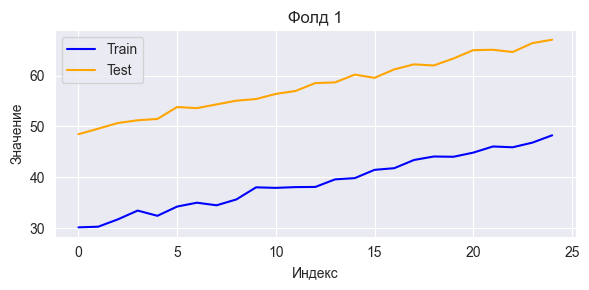

Train idx fold 2 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Test idx fold 2 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
Train value fold 2 :             0
0   30.184446
1   30.308278
2   31.758910
3   33.474947
4   32.450943
5   34.267023
6   35.024122
7   34.515593
8   35.665719
9   38.042728
10  37.937256
11  38.086903
12  38.117993
13  39.605964
14  39.849681
15  41.478280
16  41.802947
17  43.414635
18  44.098318
19  44.046131
20  44.855332
21  46.067099
22  45.911439
23  46.824313
24  48.260985
25  48.474209
26  49.565202
27  50.678441
28  51.217821
29  51.474649
30  53.817753
31  53.599989
32  54.333356
33  55.063762
34  55.383521
35  56.394860
36  56.970676
37  58.518958
38  58.654678
39  60.183183
40  59.548066
41  61.213579
42  62.197471
43  61.982181
44  63.349318
45  64.985770
46  65.063197
47  64.625770
48  66.375839
49  67.038

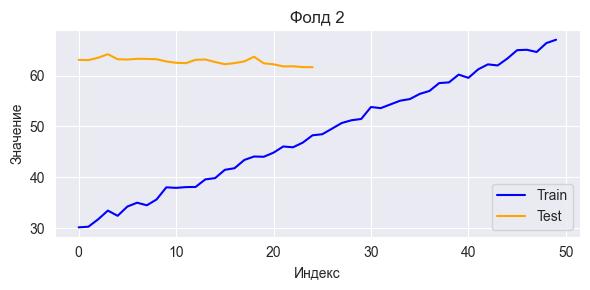

Train idx fold 3 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
Test idx fold 3 : [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]
Train value fold 3 :             0
0   30.184446
1   30.308278
2   31.758910
3   33.474947
4   32.450943
..        ...
70  62.210156
71  61.796360
72  61.814804
73  61.670337
74  61.643108

[75 rows x 1 columns]
Test value fold 3 :             0
0   62.011562
1   62.606514
2   61.642689
3   61.593270
4   62.427161
5   62.152674
6   62.197453
7   62.795749
8   62.011184
9   62.722298
10  62.431384
11  61.622571
12  62.682401
13  62.810545
14  63.553146
15  63.880644
16  63.653793
17  63.214983
18  63.266231
19  64.367296
20  63.912971
21  64.032394
22  65.377015
23  65.796934
24  64.129419


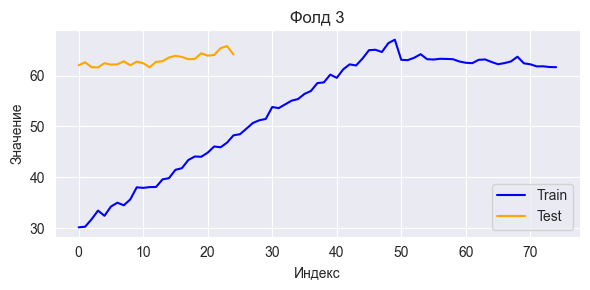

In [23]:
# üü°TODO –†–∞–∑–±–∏–≤–∞–µ–º –∏ –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º train/test –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ - TimeSeriesSplit 
 

__doc__ = '''
–î–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–∞–±–æ—Ç—ã start_idx:end_idx
False - test
True - train
'''

#  TODO –°–∏–Ω—Ç–µ–∑–∏—Ä—É–µ–º X
n_points = 100  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö
time = np.linspace(0, 15, n_points)  # —ç—Ç–æ –•

#  TODO –°–æ–∑–¥–∞–µ–º —Ä—è–¥ —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Ä–µ–∂–∏–º–∞–º–∏ –∏ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–º–∏ —Å–¥–≤–∏–≥–∞–º–∏, –ø–æ–¥–±–∏—Ä–∞–µ–º —á—Ç–æ –±—ã (regim1 + regim2 ).reshape = 100
regim1 = 30 + 5 * time[:50] + 0.1 * np.sin(time[:50] * 2) 
regim2 = regim1[-1] + (0.5 * time[30:80] - time[50]) + 2 * np.sin(time[30:80] * 0.5)
complex_series = np.concatenate([regim1, regim2])

# TODO –¥–æ–±–∞–≤–ª—è–µ–º –¥–ª—è Y  —à—É–º—ã
complex_series += np.random.normal(0, 0.5, n_points)
print(complex_series.shape)

# TODO –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –ü–æ–¥–≥–æ–Ω—è—é –ø–æ–¥ —É—á–µ–±–Ω–∏–∫, time_data –∏ series_data –ø–µ—Ä–µ–¥–∞–Ω—ã –∫–∞–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ-—Ü–∏–∏
time_data = time  # X
series_data = complex_series  # Y



# –û–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏
# train_mask = np.ones(len(series_data), dtype=bool)
# train_mask[-20:] = False

# time_train = time_data[train_mask]
# series_train = series_data[train_mask]
# time_test = time_data[~train_mask]
# series_test = series_data[~train_mask]

tscv = TimeSeriesSplit(n_splits=3)

for i, (train_index, test_index) in enumerate(tscv.split(series_data), 1):
    __doc__ = '''
    –ò–∑ tscv.split(train_mask) –í—ã–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å—ã, 
    –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã–≤–æ–¥–∏–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –∏–Ω–¥–µ–∫—Å–∏—Ä–æ–≤–∞–Ω–∏–µ–º
    '''
    # train_value = train_mask[train_index]
    # test_value = train_mask[test_index]
    
    train_values = pd.DataFrame(series_data[train_index])
    test_values = pd.DataFrame(series_data[test_index])
    
    print(f'Train idx fold {i} :', train_index)
    print(f'Test idx fold {i} :', test_index)
    print(f'Train value fold {i} :', train_values)
    print(f'Test value fold {i} :', test_values)
    
    plt.figure(figsize=(6, 3))
    plt.plot(train_values.index, train_values.values, label='Train', color='blue')
    plt.plot(test_values.index, test_values.values, label='Test', color='orange')
    plt.title(f'–§–æ–ª–¥ {i}')
    plt.xlabel('–ò–Ω–¥–µ–∫—Å')
    plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    # print(type(train_values))
    # plt.plot(train_index, train_values)